In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import scipy.stats
# basic imports

from IPython import display
%matplotlib inline

# Implementation of standard curve fitting using ML approach

In [ ]:
# model
def model(p, x):
    return (
        p[0] + p[1] * x + 5 * np.sin(x / p[2])
    )

In [ ]:
ptrue = [1, 4, 2]
def gendata(npoints=60, outlier_fraction=0.15, doplot=True):
    # Our True model 1+ 4 * x + 5 * sin(x/2)

    minx, maxx = 0, 20
    xs = np.random.uniform(minx, maxx, npoints)
    ys = model(ptrue, xs)
    # error-free data

    errs = np.random.uniform(0.1, 1, npoints)

    ys = ys + np.random.normal(size=npoints) * errs
    # perturb the data by the errors

    # introduce outliers
    outliers = np.random.uniform(-40, 40, npoints)

    subset = np.random.uniform(size=npoints) < outlier_fraction
    # subset of points which we'll make as outliers

    ys[subset] = ys[subset] + outliers[subset]
    if doplot:
        plt.errorbar(xs, ys, errs, fmt='.')
        #oplot(np.linspace(minx,maxx), model(ptrue,np.linspace(minx,maxx)),color='red')
        plt.draw()
    return xs,ys,errs

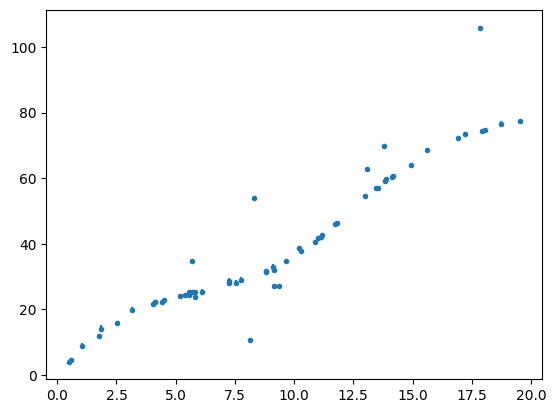

In [ ]:
np.random.seed(3)
gendata();

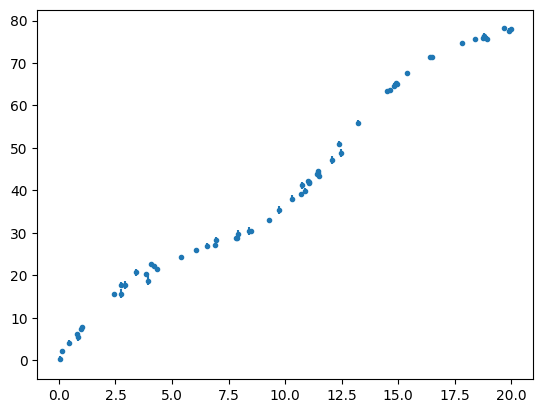

In [ ]:
gendata(outlier_fraction=0);

In [ ]:
# likelihood function not involving outliers
def like1(p, xdat, ydat, errdat):
    # p are the function parameters

    ymod = model(p, xdat)

    # lprob = scipy.stats.norm(ymod, errdat).logpdf(ydat)
    # probabilities of the data under Gaussian distribution
    # like = -lprob.sum()

    like2 = np.sum(((ymod-ydat)/errdat)**2)
    # this is -2*log(Likelihood) + C
    # This is also a chi-squares distributed number as this is a sum of squares of
    # values that have N(0,1) distribution

    #print (p, like2)
    return like2

In [ ]:
def run(npoints, outlier_fraction):
    # generate the data with npoints and specified outlier fraction and fit it
    # the optimization result is returned
    xs,ys,errs=gendata(npoints, outlier_fraction, doplot=False)

    method = 'Nelder-Mead'

    p0 = [0.5, 3, 2.5]
    res = scipy.optimize.minimize(like1, p0, method=method,
                                      args=(xs, ys, errs))
    return res

# Testing chi-square distributions
Here we run various simulations, looking at the distribution of chi-square statistics

Looking at the chi-square distribution for our model without outliers

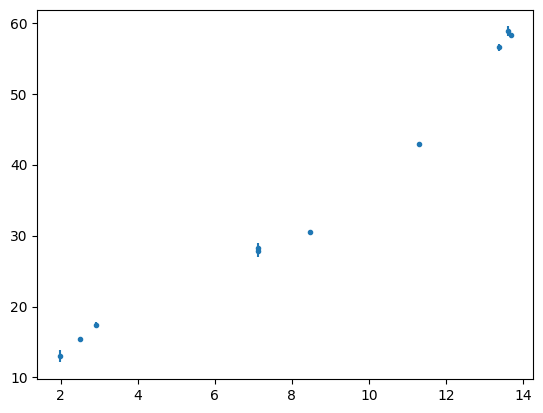

In [ ]:
npt = 10 # number of points in the data
gendata(npt, outlier_fraction=0); # just demo
nit = 1000 # number of iterations
chisqs1 = np.zeros(nit) # array of chi-squares
for i in range(nit):
    # run the model  without the outliers
    res = run(npt, 0)
    chisqs1[i] = res['fun']


In next cell we see that the distribution of chi-squares of fitted model behaves like $\chi_{n-m}^2$ where n is the number of datapoints and m is the number of parameters (3 in this case)

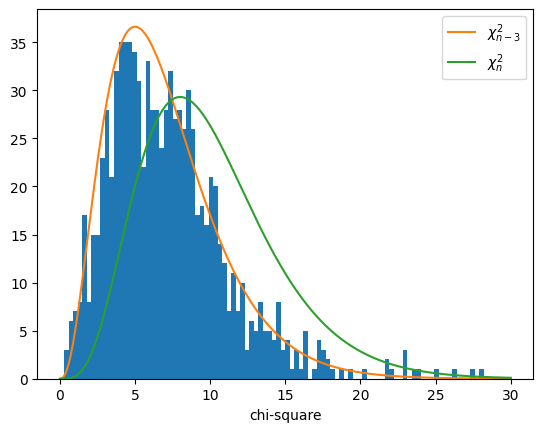

In [ ]:
plt.clf();
plt.hist(chisqs1, range=[0,3*npt], bins=100);
if True:
    # overplot the chi-square distribution
    xgrid=np.linspace(0,3*npt,1000)
    ndof = npt - 3 # number of degrees of freedom (DOF)
    # we need to remove the number of parameters from DOF
    plt.plot(xgrid, scipy.stats.chi2(ndof).pdf(xgrid)*nit*3*npt/100,label='$\chi^2_{n-3}$')
# overplot the incorrect chi-square distribution
    plt.plot(xgrid, scipy.stats.chi2(npt).pdf(xgrid)*nit*3*npt/100,label='$\chi^2_{n}$')
    plt.xlabel('chi-square')
    plt.legend()

Running the simulations/looking at the chi-square distribution with large amount of data.
Seeing the convergence of $\chi^2_n$ to the normal distribution $N(n,\sqrt{2n})$



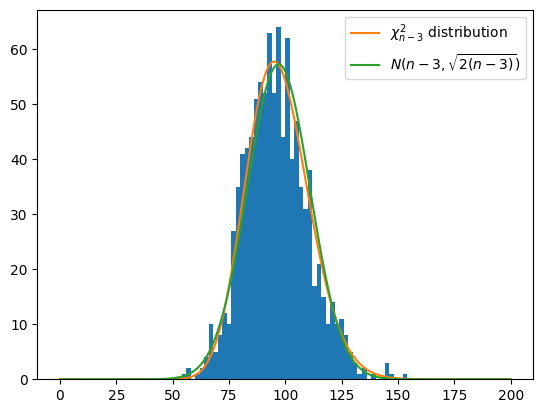

In [ ]:
# Run simulations with large amount of data
nit = 1000 # number of iterations
npt = 100 # number of points in the data
gendata(npt, outlier_fraction=0); # just demo
chisqs2 = np.zeros(nit) # array of chi-squares

for i in range(nit):
    # run the model  without the outliers
    res = run(npt, 0)
    chisqs2[i] = res['fun']

plt.clf();
plt.hist(chisqs2, range=[0,2*npt],bins=100);
xgrid=np.linspace(0, 2 * npt,1000)
# overplot the chi-square distribution
ndof = npt - 3 # number of degrees of freedom
plt.plot(xgrid, scipy.stats.chi2(ndof).pdf(xgrid)*nit*2*npt/100,label='$\chi^2_{n-3}$ distribution')
# The distribution is very close to a Gaussian
plt.plot(xgrid, scipy.stats.norm(ndof,np.sqrt(2*ndof)).pdf(xgrid)*nit*2*npt/100,label='$N(n-3,\sqrt{2 (n-3)})$')
plt.legend();

# Evaluating chi-squares for the dataset with outliers

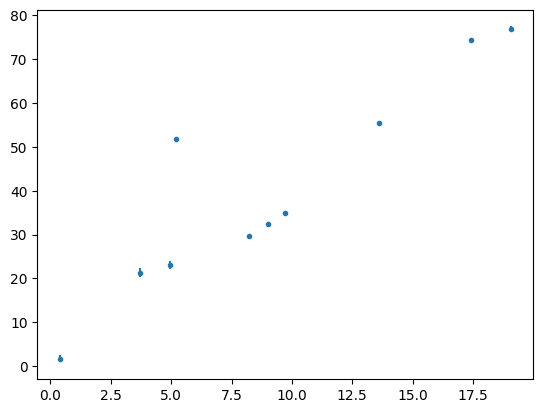

In [ ]:
nit = 1000
npt = 10
np.random.seed(33)
gendata(npt,outlier_fraction=0.15); # just demo
chisqs3 = np.zeros(nit) # array of chi-squares
for i in range(nit):
    # run the model on the data with the outliers
    res = run(npt, 0.15)
    chisqs3[i] = res['fun']

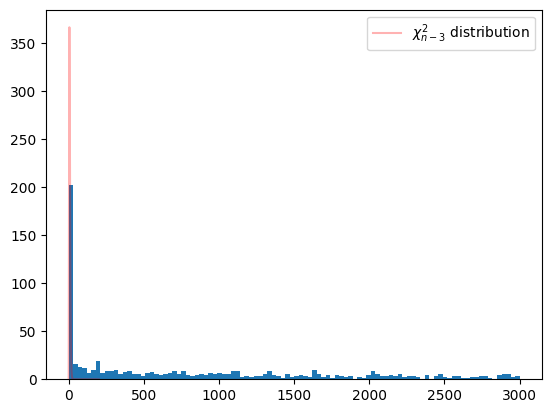

In [ ]:
plt.hist(chisqs3,range=[0,300*npt],bins=100);
ndof=npt-3
plt.plot(xgrid, scipy.stats.chi2(ndof).pdf(xgrid)*nit*30*npt/100,
          alpha=0.3,color='red',label='$\chi^2_{n-3}$ distribution')
plt.legend()

# Computing the p-values (tail probabilities based on chi-squares), to evaluate goodness of fit

pvalues [0.67477504 0.         0.1416602  0.         0.         0.
 0.47768386 0.         0.         0.36370621 0.         0.
 0.         0.         0.         0.39554124 0.         0.
 0.         0.        ]


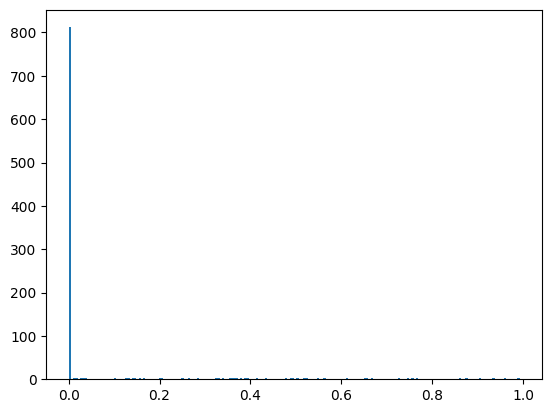

In [ ]:
# compute the probability of observing the chi-squares
ndof = npt - 3
pvalues = 1 - scipy.stats.chi2(ndof).cdf(chisqs3)
plt.hist(pvalues, bins=200);
print('pvalues', pvalues[:20])